In [1]:
from sklearn import linear_model


In [ ]:
# regr = linear_model.LinearRegression()
# regr.fit(diabetes_X_train, diabetes_y_train)
# print(regr.coef_) 


# # The mean square error
# np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

# # Explained variance score: 1 is perfect prediction
# # and 0 means that there is no linear relationship
# # between X and y.
# regr.score(diabetes_X_test, diabetes_y_test)

In [5]:
import numpy as np
np.c_?

Type:        CClass
String form: <numpy.lib.index_tricks.CClass object at 0x0000023934464820>
Length:      0
File:        c:\users\frederick.bui\appdata\local\programs\python\python310\lib\site-packages\numpy\lib\index_tricks.py
Docstring:  
Translates slice objects to concatenation along the second axis.

This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

See Also
--------
column_stack : Stack 1-D arrays as columns into a 2-D array.
r_ : For more detailed documentation.

Examples
--------
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, ..., 4, 5, 6]])

In [6]:
from sklearn import datasets, linear_model

In [17]:
import matplotlib.pyplot as plt

In [18]:
X,y = datasets.load_iris(return_X_y=True)


array([5.1, 3.5, 1.4, 0.2])

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
# plt.scatter(X_train[:,1], y_train, marker='.')
# plt.scatter(X_train[:,0], y_train, marker='x')
# plt.scatter(X_train[:,2], y_train, marker='+')



In [33]:
np.logspace(-4, 4, 10)

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [34]:
lasso = linear_model.Lasso(alpha=0.1)

scores = [lasso.set_params(alpha=alphas).fit(X_train, y_train).score(X_test, y_test) for alphas in np.linspace(0.1, 1, 10)]
scores

[0.9044577045136054,
 0.8896085936890276,
 0.8645693299071315,
 0.8293399131679173,
 0.7839203434713846,
 0.7283106208175337,
 0.6625107452063643,
 0.5865207166378769,
 0.5003405351120711,
 0.40397020062894695]

In [38]:
# plt.plot(np.linspace(0.1, 1, 10), scores)


Lasso()

In [36]:
lasso.coef_

array([ 0.        , -0.        ,  0.11227427,  0.        ])

In [37]:
lasso.intercept_

0.5732578695983741

In [40]:
lasso.sparse_coef_.toarray()

array([[0.        , 0.        , 0.11227427, 0.        ]])

In [41]:
lasso._estimator_type


'regressor'

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
n_neighbors = np.arange(1,50,1) 
scores = [knn.set_params(n_neighbors=n).fit(X_train, y_train).score(X_test, y_test) for n in n_neighbors]
# scores

In [46]:
# plt.plot(n_neighbors, scores)

In [47]:
from sklearn.preprocessing import StandardScaler


std_scaler = StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)


In [48]:
np.logspace(-4, 4, 10)

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [60]:
from sklearn.svm import SVC

svm = SVC()
scores = [svm.set_params(C=c).fit(X_train_std, y_train).score(X_test_std, y_test) for c in np.linspace(0.01,0.2)]

In [61]:
scores

[0.3,
 0.3,
 0.3,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.7666666666666667,
 0.8333333333333334,
 0.9,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

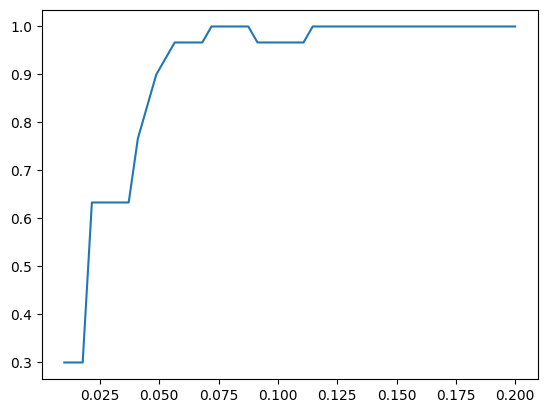

In [62]:
plt.plot(np.linspace(0.01,0.2), scores)

In [88]:
from sklearn.model_selection import train_test_split

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [89]:
np.unique(y_train_strat, return_counts=True), np.unique(y_test_strat, return_counts=True)

((array([0, 1, 2]), array([40, 40, 40], dtype=int64)),
 (array([0, 1, 2]), array([10, 10, 10], dtype=int64)))

In [90]:
new_model = SVC(C=1)
X_train_strat_std_0_1 = std_scaler.fit_transform(X_train_strat)[:, [0,1]]
# svc.fit(X_train_strat_std_0_1, y_train_strat)
# svc.score(std_scaler.fit_transform(X_test_strat)[:, [0,1]], y_test_strat)

In [91]:
scores = [new_model.set_params(kernel=ker).fit(X_train_strat_std_0_1, y_train_strat)
          .score(std_scaler.fit_transform(X_test_strat)[:, [0,1]], y_test_strat) 
          for ker in ['linear', 'poly', 'rbf', 'sigmoid']]
scores

[0.7333333333333333, 0.7, 0.7, 0.7666666666666667]

In [92]:
for c in np.arange(0.1, 1, 0.1):
    new_model.set_params(C=c)
    print([new_model.set_params(kernel=ker).fit(X_train_strat_std_0_1, y_train_strat)
           .score(std_scaler.fit_transform(X_test_strat)[:, [0,1]], y_test_strat) 
          for ker in ['linear', 'poly', 'rbf', 'sigmoid']])

[0.7, 0.6666666666666666, 0.7, 0.7666666666666667]
[0.7, 0.7, 0.7, 0.7333333333333333]
[0.7, 0.7, 0.7, 0.7333333333333333]
[0.7, 0.7, 0.7, 0.7333333333333333]
[0.7, 0.7, 0.7, 0.7333333333333333]
[0.7, 0.7, 0.7, 0.7333333333333333]
[0.7, 0.7, 0.7, 0.7333333333333333]
[0.7, 0.7, 0.7, 0.7333333333333333]
[0.7333333333333333, 0.7, 0.7, 0.7666666666666667]


In [94]:
np.array_split(np.arange(11), 3)

[array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10])]

In [95]:
X.shape, y.shape

((150, 4), (150,))

In [163]:
X,y = datasets.load_iris(return_X_y=True)
rng = np.random.default_rng(69)
idx = rng.permutation(np.arange(0, len(X)))
X_shuffled, y_shuffled = X[idx], y[idx]
X_folds, y_folds = np.array_split(X_shuffled, 5), np.array_split(y_shuffled, 5)   

In [149]:


def kfold_cv(scores:list, model, num_folds:int, X_folds, y_folds):
    for k in range(num_folds):
        X_train = X_folds.copy()
        X_test_kfold = X_train.pop(k)
        X_train_kfold = np.concatenate(X_train)
        y_train = y_folds.copy()
        y_test_kfold = y_train.pop(k)
        y_train_kfold = np.concatenate(y_train)
        scores.append(model.fit(X_train_kfold, y_train_kfold).score(X_test_kfold, y_test_kfold))
        
def param_iter(new_model, param_dic):
    new_model.set_params(**param_dic)
    return new_model



In [152]:
import itertools
def training_loop():
    scores = []
    epochs = 10
    ker = ['linear', 'poly', 'rbf', 'sigmoid']
    C = np.linspace(0.1, 1, 10)
    param_keys = ['kernel', 'C']
    combinations = list(itertools.product(ker, C))
    
    param_dicts = [{k:v for k,v in zip(param_keys, combinations[i])} 
                for i in range(len(combinations))]     
    for dic in param_dicts:
        new_model = SVC()
        for c in range(epochs): #should have better logging
            new_model.set_params(**dic)
            kfold_cv(scores, new_model, 5, X_folds, y_folds)
    return scores


In [153]:
# training_loop()

In [162]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
a = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
b = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]

k_fold = KFold(n_splits=5)
k_fold_strat = StratifiedKFold(n_splits=3)
for train_indices, test_indices in k_fold.split(a):
    print('Train: %s | test: %s' % (train_indices, test_indices))
    
for strat_train, strat_test in k_fold_strat.split(a, b):
    print('Train_strat: %s | test_strat: %s' % (strat_train, strat_test))
     

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]
Train_strat: [1 2 4 7 8 9] | test_strat: [0 3 5 6]
Train_strat: [0 2 3 5 6 8 9] | test_strat: [1 4 7]
Train_strat: [0 1 3 4 5 6 7] | test_strat: [2 8 9]


c:\Users\frederick.bui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [173]:
X,y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [174]:
cross_val_score(SVC(), X_train, y_train, cv=k_fold, n_jobs=-1)

array([0.95833333, 1.        , 0.95833333, 0.95833333, 1.        ])

In [184]:
from sklearn.model_selection import ShuffleSplit


for tr, te in ShuffleSplit(n_splits=2, test_size=0.25, random_state=0).split(X,y):
    print(tr.shape, end='\n\n')
    print(te.shape, end='\n\n')

(112,)

(38,)

(112,)

(38,)



In [185]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score
X, y = datasets.load_digits(return_X_y=True)
svc = svm.SVC(kernel="linear")
C_s = np.logspace(-10, 0, 10)
scores = list()
scores_std = list()

In [190]:
scores.clear()
scores_std.clear()
for c in C_s:
    svc=SVC()
    svc.set_params(C = c)
    s = cross_val_score(svc, X, y, cv=5, n_jobs=-1)
    scores.append(np.mean(s))
    scores_std.append(np.std(s))


In [192]:
scores, scores_std

([0.15866295264623956,
  0.15866295264623956,
  0.15866295264623956,
  0.15866295264623956,
  0.15866295264623956,
  0.15866295264623956,
  0.15866295264623956,
  0.15866295264623956,
  0.9204302073661406,
  0.9632838130609718],
 [0.04802751879644631,
  0.04802751879644631,
  0.04802751879644631,
  0.04802751879644631,
  0.04802751879644631,
  0.04802751879644631,
  0.04802751879644631,
  0.04802751879644631,
  0.026195833816765268,
  0.02008605863225686])

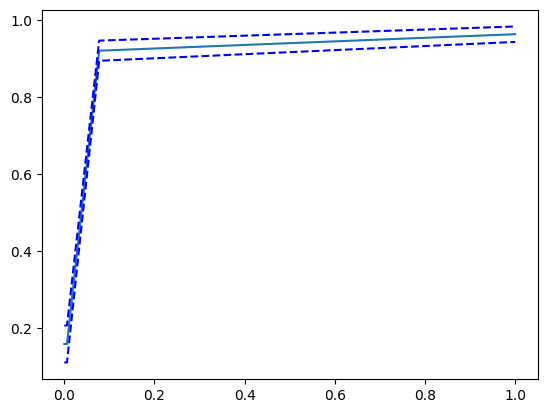

In [195]:
plt.plot(C_s, scores)
plt.plot(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.plot(C_s, np.array(scores) - np.array(scores_std), 'b--')


In [ ]:
# plt.semilogx(C_s, scores)
# plt.semilogx(C_s, np.array(scores) + np.array(scores_std), "b--")
# plt.semilogx(C_s, np.array(scores) - np.array(scores_std), "b--")

In [198]:
from sklearn.model_selection import GridSearchCV


clf = GridSearchCV(estimator=svc, param_grid=dict(C=C_s), n_jobs=-1, verbose=1, cv=10)
clf.fit(X, y)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-10, 1.29154967e-09, 1.66810054e-08, 2.15443469e-07,
       2.78255940e-06, 3.59381366e-05, 4.64158883e-04, 5.99484250e-03,
       7.74263683e-02, 1.00000000e+00])},
             verbose=1)

In [199]:
clf.best_score_, clf.best_estimator_, clf.best_params_

(0.9699503414028554, SVC(), {'C': 1.0})

In [200]:
clf.cv_results_

{'mean_fit_time': array([0.64491398, 0.56951616, 0.4645097 , 0.53581107, 0.50220547,
        0.46440516, 0.4807128 , 0.49010983, 0.27120545, 0.10610106]),
 'std_fit_time': array([0.05464195, 0.08404129, 0.03467419, 0.05544638, 0.03419257,
        0.05571985, 0.03496423, 0.02356986, 0.02734688, 0.01165677]),
 'mean_score_time': array([0.10330403, 0.0907974 , 0.09700222, 0.10580413, 0.09040091,
        0.08710153, 0.09059882, 0.09410207, 0.0890023 , 0.03490686]),
 'std_score_time': array([0.0673053 , 0.03735309, 0.04278225, 0.05883397, 0.04668939,
        0.05435235, 0.04802886, 0.03808354, 0.05621875, 0.02465576]),
 'param_C': masked_array(data=[1e-10, 1.2915496650148826e-09, 1.6681005372000592e-08,
                    2.1544346900318867e-07, 2.782559402207126e-06,
                    3.5938136638046256e-05, 0.0004641588833612782,
                    0.005994842503189421, 0.07742636826811278, 1.0],
              mask=[False, False, False, False, False, False, False, False,
             

In [202]:
clf.cv_results_['params']

[{'C': 1e-10},
 {'C': 1.2915496650148826e-09},
 {'C': 1.6681005372000592e-08},
 {'C': 2.1544346900318867e-07},
 {'C': 2.782559402207126e-06},
 {'C': 3.5938136638046256e-05},
 {'C': 0.0004641588833612782},
 {'C': 0.005994842503189421},
 {'C': 0.07742636826811278},
 {'C': 1.0}]

In [203]:
X,y = datasets.load_diabetes(return_X_y=True)


In [212]:
from sklearn.linear_model import LassoCV


lassoCV = LassoCV(cv=5, random_state=0, alphas=np.logspace(-4, 4, 10)).fit(X, y)

In [213]:
lassoCV.coef_

array([  -9.90849071, -239.72370132,  519.88808956,  324.28852947,
       -784.9803431 ,  471.20335961,   97.61130218,  175.80143125,
        748.67906812,   67.61170647])

In [214]:
lassoCV.alpha_

0.0001

In [216]:
lassoCV.score(X, y)

0.5177480777185302

In [230]:
y.shape

(442,)

In [233]:
from sklearn.linear_model import Lasso


las = GridSearchCV(Lasso(), param_grid=dict(alpha=np.linspace(.01, 0.001, 10)), n_jobs=-1, cv=10, verbose=1)
las.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
       0.001])},
             verbose=1)

In [234]:
las.cv_results_

{'mean_fit_time': array([0.00149965, 0.00190008, 0.00240567, 0.00150068, 0.00189378,
        0.00179918, 0.00322807, 0.00141737, 0.00275269, 0.00264454]),
 'std_fit_time': array([0.0005002 , 0.00053905, 0.00335796, 0.00050618, 0.00053794,
        0.00040112, 0.00253089, 0.00083487, 0.00158357, 0.00069735]),
 'mean_score_time': array([0.00059977, 0.00049996, 0.00084574, 0.00040281, 0.00040052,
        0.00030065, 0.00047443, 0.00064158, 0.00047488, 0.00060029]),
 'std_score_time': array([0.00048971, 0.00049996, 0.00070546, 0.0004934 , 0.00049053,
        0.00045924, 0.00047968, 0.00076831, 0.00055918, 0.00051213]),
 'param_alpha': masked_array(data=[0.01, 0.009000000000000001, 0.008, 0.007, 0.006, 0.005,
                    0.004, 0.003, 0.002, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.009000000000000001},
  {'alpha':

In [236]:
from sklearn import cluster, datasets
X_iris, y_iris = datasets.load_iris(return_X_y=True)

k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X_iris)
print(k_means.labels_[::10])
print(y_iris[::10])

[5 5 5 1 5 2 4 6 7 7 0 0 0 3 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


c:\Users\frederick.bui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [237]:
X_iris.shape

(150, 4)

In [242]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X_iris)

PCA()

In [243]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [244]:
datasets.load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [245]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [246]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])